<a href="https://colab.research.google.com/github/pawankapakayala/pawankapakayala/blob/main/SubTitleCensorHelper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Censor Helper
The following program is to analyze explicit words and replace them with non explicit ones. You can modify / extend this list of explicit words and their replacements.

### Instructions
1. Upload the srt file

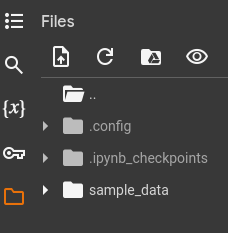
2. Update the name of the srt file in the code cell below.
3. Update the delay if any between audio and sub titles.
4. Run all the cells

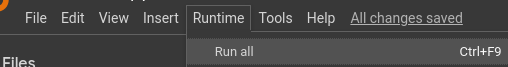
5. Refresh the files.

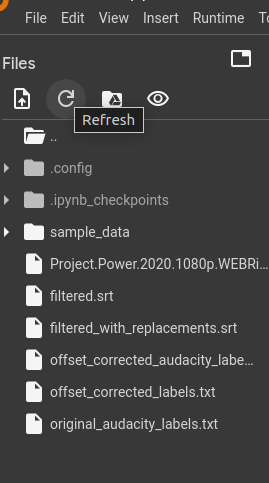

In [ ]:
srt_file = 'tt6806448-pl.srt'
audio_sub_titles_offset_seconds = 0.0

In [ ]:
import re
from typing import List, Tuple, Dict

explicit_words_replacement = {
    "fuck": "fudge",
    "shit": "shoot",
    "cunt": "jerk",
    "cock": "rooster",
    "dick": "jerk",
    "pussy": "cat",
    "ass": "butt",
    "slut": "promiscuous",
    "whore": "worker",
    "dildo": "toy",
    "blowjob": "kiss",
    "cum": "come",
    "tits": "breasts",
    "penis": "organ",
    "vagina": "part",
    "anal": "backside",
    "orgasm": "climax",
    "masturbation": "self-care",
    "porn": "adult film",
    "erection": "rise",
    "nipples": "buds",
    "semen": "fluid",
    "sperm": "cell",
    "clit": "bud",
    "damn": "darn",
    "hell": "heck",
    "bastard": "rascal",
    "asshole": "jerk",
    "prick": "thorn",
    "motherfucker": "idiot",
    "fucker": "idiot",
    "bitch": "witch",
    "son of a bitch": "scoundrel",
    "shithead": "blockhead",
    "jackass": "donkey",
    "dickhead": "jerk",
    "douche": "fool",
    "crap": "junk",
    "balls": "guts",
    "piss": "pee",
    "twat": "fool",
    "scumbag": "low-life",
    "wanker": "fool",
    "fag": "dude",
    "dyke": "woman",
    "queer": "odd",
    "homo": "person",
    "tranny": "person",
    "fisting": "punching",
    "gangbang": "group meeting",
    "gook": "person",
    "spic": "person",
    "chink": "person",
    "heroin": "drug",
    "cocaine": "drug",
    "meth": "drug",
    "weed": "plant",
    "drug": "medicine",
    "buttplug": "stopper",
    "clitoris": "bud",
    "dickwad": "jerk",
    "doggystyle": "style",
    "ejaculate": "release",
    "facial": "face",
    "faggot": "person",
    "felching": "nonsense",
    "foreskin": "covering",
    "gangbang": "group activity",
    "handjob": "work",
    "hentai": "anime",
    "hump": "bump",
    "jizz": "fluid",
    "kike": "person",
    "klit": "bud",
    "milf": "lady",
    "muff": "cover",
    "nazi": "person",
    "negro": "person",
    "nigga": "dude",
    "nigger": "person",
    "nipple": "bud",
    "orgy": "party",
    "paki": "person",
    "pecker": "bird",
    "peehole": "outlet",
    "pissflaps": "annoying",
    "poon": "friend",
    "prick": "thorn",
    "pube": "hair",
    "pussylicking": "kissing",
    "rapist": "criminal",
    "rimjob": "kiss",
    "scrotum": "skin",
    "shag": "dance",
    "shemale": "person",
    "shitfaced": "drunk",
    "skank": "mess",
    "slutty": "promiscuous",
    "smegma": "dirt",
    "spunk": "energy",
    "titty": "breast",
    "tits": "breasts",
    "tosser": "thrower",
    "twat": "fool",
    "wank": "play",
    "whore": "worker"
}


def replace_explicit_words(text: str, replacement_dict: Dict[str, str]) -> Tuple[str, List[Tuple[str, str]]]:
    """
    Replaces explicit words in the text with their non-explicit counterparts and tracks the replacements.

    :param text: Original text.
    :param replacement_dict: Dictionary with explicit words and their replacements.
    :return: Tuple of the modified text and a list of replaced words with their replacements.
    """
    replacements = []
    for word, replacement in replacement_dict.items():
        pattern = re.compile(rf'\b{word}\b', re.IGNORECASE)
        matches = pattern.findall(text)  # Find all instances of the word
        if matches:
            text = pattern.sub(replacement, text)
            replacements.extend([(match, replacement) for match in matches])
    return text, replacements

def generate_filtered_srt_with_replacements(srt_content: str, replacement_dict: dict) -> Tuple[str, List[Tuple[str, str]]]:
    """
    Generates filtered SRT content by replacing explicit content with similar non-explicit words.

    :param srt_content: Content of the SRT file as a string.
    :param replacement_dict: Dictionary of explicit words and their replacements.
    :return: Tuple of the filtered SRT content and a list of replaced words with their replacements.
    """
    timestamp_pattern = r'(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})'
    blocks = srt_content.strip().split('\n\n')
    filtered_blocks = []
    all_replacements = []

    for block in blocks:
        lines = block.split('\n')
        if len(lines) < 3:
            continue
        timestamp = lines[1]
        text = ' '.join(lines[2:])

        # Replace explicit words with non-explicit alternatives
        new_text, replacements = replace_explicit_words(text, replacement_dict)
        filtered_block = f"{lines[0]}\n{timestamp}\n{new_text}"
        filtered_blocks.append(filtered_block)
        all_replacements.extend(replacements)

    return '\n\n'.join(filtered_blocks), all_replacements


def extract_explicit_words_timestamps(srt_content: str, explicit_words: Dict[str, str]) -> List[Tuple[str, str, str, str]]:
    """
    Extracts timestamps and replaces explicit words in the SRT content with dashes.

    :param srt_content: Content of the SRT file as a string.
    :param explicit_words: List of explicit words to censor.
    :return: List of tuples containing start time, end time, the explicit word, and the censored text.
    """
    timestamp_pattern = r'(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})'
    blocks = srt_content.strip().split('\n\n')
    results = []

    for block in blocks:
        lines = block.split('\n')
        if len(lines) < 3:
            continue
        timestamp = lines[1]
        start_time, end_time = re.match(timestamp_pattern, timestamp).groups()
        text = ' '.join(lines[2:])

        for word in explicit_words:
            if re.search(rf'\b{word}\b', text, re.IGNORECASE):
                new_txt = re.sub(rf'\b{word}\b', explicit_words_replacement[word], text, flags=re.IGNORECASE)
                results.append((start_time, end_time, word, explicit_words_replacement[word], new_txt))
                break

    return results


def generate_filtered_srt_old(srt_content: str, explicit_words: List[str]) -> str:
    """
    Generates filtered SRT content by replacing explicit content with '[Filtered Content]'.

    :param srt_content: Content of the SRT file as a string.
    :param explicit_words: List of explicit words to censor.
    :return: Filtered SRT content as a string.
    """
    timestamp_pattern = r'(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})'
    blocks = srt_content.strip().split('\n\n')
    filtered_blocks = []

    for block in blocks:
        lines = block.split('\n')
        if len(lines) < 3:
            continue
        timestamp = lines[1]
        text = ' '.join(lines[2:])

        contains_explicit = any(re.search(rf'\b{word}\b', text, re.IGNORECASE) for word in explicit_words)

        if contains_explicit:
            filtered_blocks.append(f"{lines[0]}\n{timestamp}\n[Filtered Content]")

    return '\n\n'.join(filtered_blocks)


def generate_filtered_srt_with_original_text(srt_content: str, explicit_words: List[str]) -> str:
    """
    Generates filtered SRT content by replacing explicit content with '[Filtered Content]',
    and includes the original text only for the filtered content.

    :param srt_content: Content of the SRT file as a string.
    :param explicit_words: List of explicit words to censor.
    :return: Filtered SRT content with original text included as a string.
    """
    timestamp_pattern = r'(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})'
    blocks = srt_content.strip().split('\n\n')
    filtered_blocks = []

    for block in blocks:
        lines = block.split('\n')
        if len(lines) < 3:
            continue
        timestamp = lines[1]
        text = ' '.join(lines[2:])

        contains_explicit = False
        for word in explicit_words:
            if re.search(rf'\b{word}\b', text, re.IGNORECASE):
                contains_explicit = True
                break

        if contains_explicit:
            filtered_block = f"{lines[0]}\n{timestamp}\n[Filtered Content]\nOriginal: {text}"
            filtered_blocks.append(filtered_block)

    return '\n\n'.join(filtered_blocks)


def generate_audacity_label_file(input_srt_path: str, output_label_file_path: str, explicit_words: List[str]):
    """
    Generates an Audacity label file based on explicit content in the SRT file.

    :param input_srt_path: Path to the input SRT file.
    :param output_label_file_path: Path to the output label file.
    :param explicit_words: List of explicit words to censor.
    """

    def srt_time_to_seconds(srt_time: str) -> float:
        hours, minutes, seconds = srt_time.split(':')
        seconds, milliseconds = seconds.split(',')
        return int(hours) * 3600 + int(minutes) * 60 + int(seconds) + int(milliseconds) / 1000

    with open(input_srt_path, 'r', encoding='utf-8') as srt_file:
        content = srt_file.read()

    timestamp_pattern = r'(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})'
    blocks = content.strip().split('\n\n')
    labels = []

    for block in blocks:
        lines = block.split('\n')
        if len(lines) < 3:
            continue
        timestamp = lines[1]
        start_time, end_time = re.match(timestamp_pattern, timestamp).groups()
        text = ' '.join(lines[2:])

        contains_explicit = any(re.search(rf'\b{word}\b', text, re.IGNORECASE) for word in explicit_words)

        if contains_explicit:
            start_seconds = srt_time_to_seconds(start_time)
            end_seconds = srt_time_to_seconds(end_time)
            labels.append(f"{start_seconds}\t{end_seconds}\tFiltered Content")

    with open(output_label_file_path, 'w', encoding='utf-8') as label_file:
        label_file.write("\n".join(labels))


def adjust_labels_with_offset(label_file_path: str, output_label_file_path: str, offset_seconds: float):
    """
    Adjusts the labels in an Audacity label file by a given offset and writes to a new file.

    :param label_file_path: Path to the input Audacity label file.
    :param output_label_file_path: Path to the output label file with adjusted times.
    :param offset_seconds: The time offset in seconds to be applied to the labels.
    """
    adjusted_labels = []

    with open(label_file_path, 'r', encoding='utf-8') as label_file:
        lines = label_file.readlines()

        for line in lines:
            parts = line.strip().split('\t')
            if len(parts) < 3:
                continue
            start_time = float(parts[0])
            end_time = float(parts[1])
            label = parts[2]

            adjusted_start = max(0, start_time + offset_seconds)
            adjusted_end = max(0, end_time + offset_seconds)

            adjusted_labels.append(f"{adjusted_start}\t{adjusted_end}\t{label}")

    with open(output_label_file_path, 'w', encoding='utf-8') as output_file:
        output_file.write("\n".join(adjusted_labels))


def generate_censored_srt_file(input_srt_path: str, output_srt_path: str, explicit_words: List[str]):
    """
    Reads an SRT file, replaces explicit words with '-', and writes the result to a new SRT file.

    :param input_srt_path: Path to the input SRT file.
    :param output_srt_path: Path to the output SRT file with censored content.
    :param explicit_words: List of explicit words to censor.
    """
    with open(input_srt_path, 'r', encoding='utf-8') as srt_file:
        content = srt_file.read()

    blocks = content.strip().split('\n\n')
    censored_blocks = []

    for block in blocks:
        lines = block.split('\n')
        if len(lines) < 3:
            continue
        timestamp = lines[1]
        text = ' '.join(lines[2:])

        for word in explicit_words:
            text = re.sub(rf'\b{word}\b', '-' * len(word), text, flags=re.IGNORECASE)

        censored_block = f"{lines[0]}\n{timestamp}\n{text}"
        censored_blocks.append(censored_block)

    censored_srt_content = '\n\n'.join(censored_blocks)

    with open(output_srt_path, 'w', encoding='utf-8') as output_file:
        output_file.write(censored_srt_content)


def main():
    try:

        with open(srt_file, 'rt') as fp:
            subtitles = fp.read()
        print("Extracted timestamps with explicit words:")
        for item in extract_explicit_words_timestamps(subtitles, explicit_words_replacement):
            print(item)
        filtered = generate_filtered_srt_with_original_text(subtitles, explicit_words_replacement)
        with open('filtered.srt', 'wt') as fp:
            fp.write(filtered)
            print('Wrote filtered file: filtered.srt')
        generate_audacity_label_file(srt_file, 'original_audacity_labels.txt', explicit_words_replacement)
        print('Generated Audacity label file: original_audacity_labels.txt')
        adjust_labels_with_offset('original_audacity_labels.txt', 'offset_corrected_audacity_labels.txt', audio_sub_titles_offset_seconds)
        print('Adjusted labels with offset and wrote to: offset_corrected_audacity_labels.txt')
        # generate_censored_srt_file(srt_file, 'censored.srt', explicit_words_extended)
        # print('Generated censored SRT file: censored.srt')
        # Generate SRT content with replacements
        filtered_with_replacements, replacements = generate_filtered_srt_with_replacements(subtitles,
                                                                                           explicit_words_replacement)
        with open('filtered_with_replacements.srt', 'wt', encoding='utf-8') as fp:
            fp.write(filtered_with_replacements)
            print('Wrote filtered file with replacements: filtered_with_replacements.srt')

        # Print the list of replaced words along with the original words
        print("\nList of replaced words:")
        for original, replacement in replacements:
            print(f"Original: {original}, Replacement: {replacement}")

    except Exception as e:
        print(f"An error occurred: {e}")


if __name__ == '__main__':
    main()


Extracted timestamps with explicit words:
Wrote filtered file: filtered.srt
Generated Audacity label file: original_audacity_labels.txt
Adjusted labels with offset and wrote to: offset_corrected_audacity_labels.txt
Wrote filtered file with replacements: filtered_with_replacements.srt

List of replaced words:
